Zadanie: kupujemy mieszkanie
Zamierzasz kupić mieszkanie. Upatrzone M kosztuje w tym momencie 120 tys. zł, jednak przewidujesz, że przez następne 5 lat ceny mieszkań będą rosły w tempie 5% rocznie. W tym momencie nie dysponujesz wystarczającymi środkami, dlatego znajdujesz ofertę banku, który proponuje lokatę, do której dopłacasz pewna stałą kwotę na koniec każdego miesiąca. Bank oferuje nominalną stopę procentową w wysokości 12% w skali roku, przy kapitalizacji miesięcznej.

Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.
Do wykonania powyższego zadania wykorzystaj biblioteki NumPy, NumPy-financial oraz Matplotlib. Odpowiedzi na pytania umieść w Notebooku (jeśli korzystasz) lub w komentarzach w kodzie.

In [8]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

#def cena_mieszkania(cena, wzrost, lata):
 #   wartosc_koncowa = cena * (1 + wzrost) ** lata
  #  return wartosc_koncowa


cena = 120000
wzrost = 0.05
lata = 5
okresy = np.arange(1, lata + 1)         #określa wektor liczby lat

lokata_stopa = 0.12 / 12
lokata_okres = lata * 12



#cena_bazowa = np.zeros(lata) + cena
#print(cena_bazowa)
#cena_dodana = np.cumsum(cena_bazowa * wzrost)
#print(cena_dodana)
cena_5_lat = np.round(cena * (1 + wzrost) ** lata, 2)
print(cena_5_lat)                   #cena mieszkania za 5 lat


lokata = - np.round(npf.pmt(lokata_stopa, lokata_okres, 0, cena_5_lat), 0)       #tyle trzeba wpłacać co miesiąc
print(lokata)






153153.79
1875.0


Wykres:

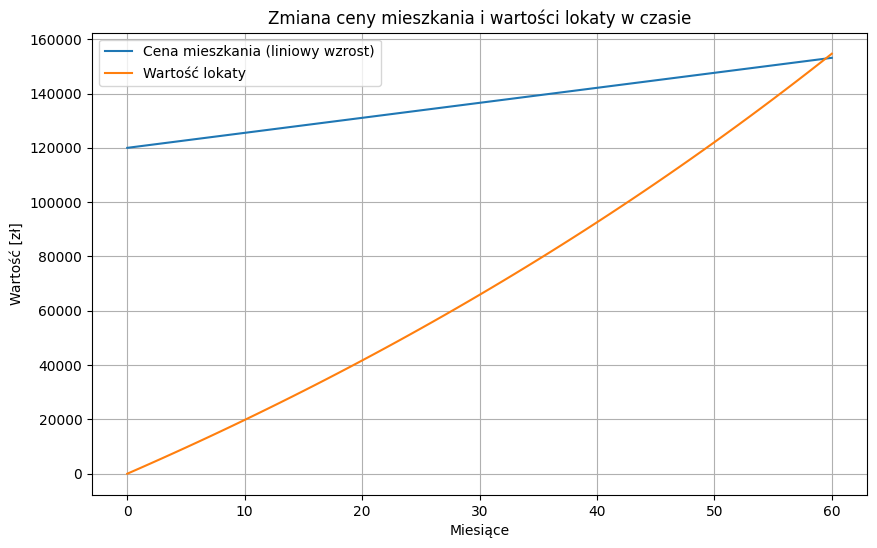

In [ ]:
miesiace = np.arange(0, lokata_okres + 1)

# cena mieszkania
cena_miesieczna = np.linspace(cena, cena_5_lat, lokata_okres + 1)

# wartosc lokaty w miesiacu
wartosc_lokaty = [0]
for i in range(1, lokata_okres + 1):
    wartosc_lokaty.append((wartosc_lokaty[-1] + lokata) * (1 + lokata_stopa))

wartosc_lokaty = np.array(wartosc_lokaty)

# wykres
plt.figure(figsize=(10,6))
plt.plot(miesiace, cena_miesieczna, label='Cena mieszkania (liniowy wzrost)')
plt.plot(miesiace, wartosc_lokaty, label='Wartość lokaty')
plt.xlabel('Miesiące')
plt.ylabel('Wartość [zł]')
plt.title('Zmiana ceny mieszkania i wartości lokaty w czasie')
plt.legend()
plt.grid(True)
plt.show()